In [1]:
import pandas_datareader as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2022,1,1)

In [3]:
britannia = web.DataReader('BRITANNIA.BO', 'yahoo', start, end)

In [4]:
britannia.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,931.000000,912.500000,920.099976,915.349976,20900.0,844.491089
2015-01-02,943.500000,916.599976,920.000000,939.750000,41680.0,867.002258
2015-01-05,962.500000,938.025024,940.875000,941.400024,45982.0,868.524536
2015-01-06,953.099976,927.275024,941.349976,945.750000,31700.0,872.537781
2015-01-07,1005.500000,950.500000,952.500000,1000.375000,115384.0,922.934082


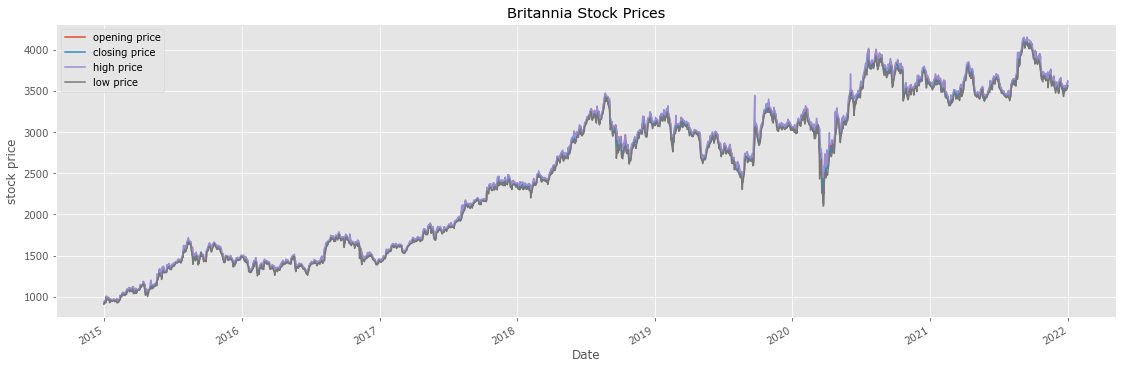

In [5]:
britannia['Open'].plot(label = 'opening price', figsize=(19,6))
britannia['Close'].plot(label = 'closing price')
britannia['High'].plot(label = 'high price')
britannia['Low'].plot(label = 'low price')

plt.legend()
plt.title('Britannia Stock Prices')
plt.ylabel('stock price')
plt.show()

## <u><center>Volume Traded Visualization</center>

Text(0.5, 1.0, 'Volume traded')

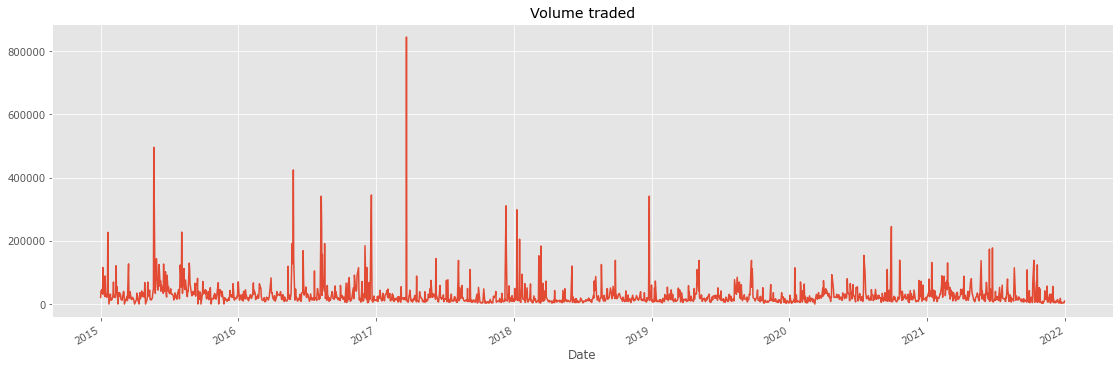

In [6]:
britannia['Volume'].plot(figsize=(19,6))
plt.title('Volume traded')

## <u><center>analyzing 3 IT companies TCS, WIPRO and INFOSYS</center>

In [7]:
tcs = web.DataReader('TCS.NS', 'yahoo', start, end)
wipro = web.DataReader('WIPRO.NS', 'yahoo', start, end)
infosys = web.DataReader('INFY.NS', 'yahoo', start, end)

In [8]:
tcs.to_csv('./Data/tcs stocks.csv')
wipro.to_csv('./Data/wipro stocks.csv')
infosys.to_csv('./Data/infosys stocks.csv')

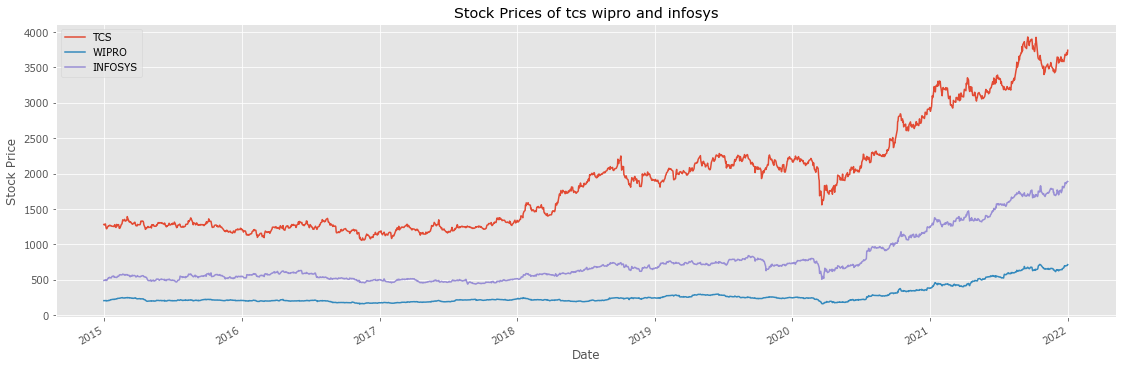

In [9]:
tcs['Open'].plot(label='TCS', figsize=(19,6))
wipro['Open'].plot(label='WIPRO')
infosys['Open'].plot(label='INFOSYS')
plt.ylabel('Stock Price')
plt.title('Stock Prices of tcs wipro and infosys')
plt.legend()

## <u><center>Volume Traded and Interpretations</center>

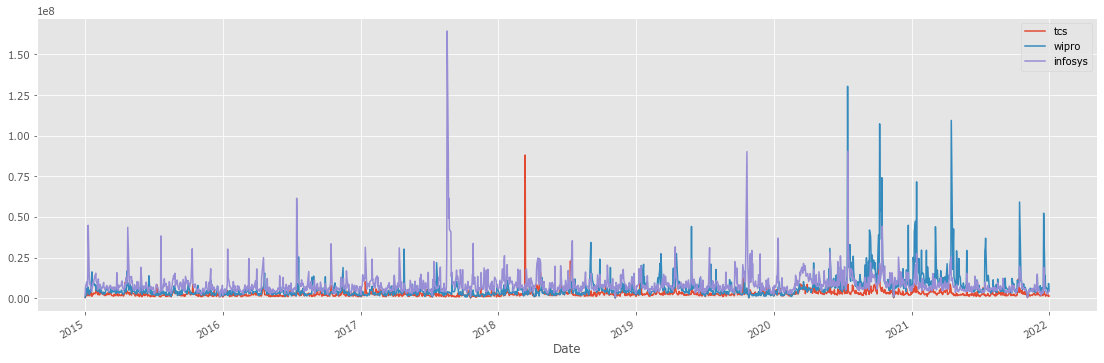

In [10]:
tcs['Volume'].plot(label='tcs', figsize=(19,6))
wipro['Volume'].plot(label='wipro')
infosys['Volume'].plot(label='infosys')
plt.legend()

## <u><center>spike in wipro volume traded in april let's narrow down that area</center>

In [11]:
infosys.iloc[[infosys['Volume'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-18,508.950012,442.100006,508.950012,461.625,164404960.0,409.905701


In [12]:
infosys['Volume'].argmax()

648

<AxesSubplot:xlabel='Date'>

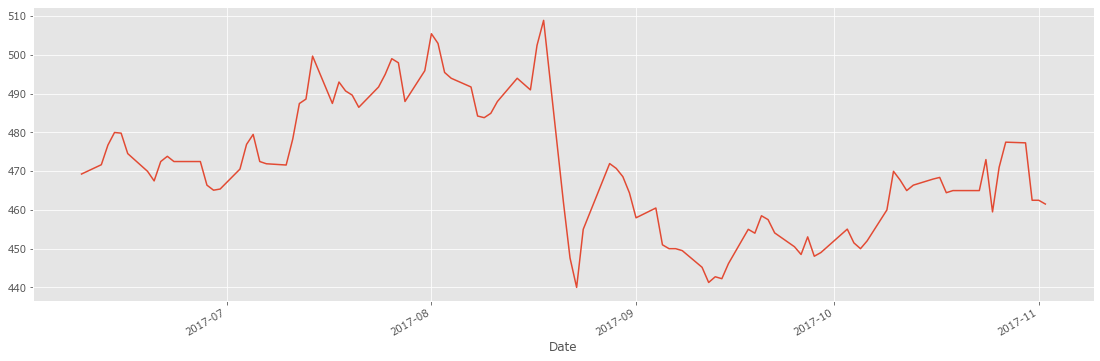

In [13]:
infosys.iloc[600:700]['Open'].plot(figsize=(19,6))

* reason of this sudden movement beacuse Wipro Limited Announced Results for the Fourth Quarter Ended March 31 2021 on April 15, 2021

## <u><center>Let's create one column name total money traded</center>

In [14]:
tcs['Total_traded'] = tcs['Open']*tcs['Volume']
wipro['Total_traded'] = wipro['Open']*wipro['Volume']
infosys['Total_traded'] = infosys['Open']*infosys['Volume']

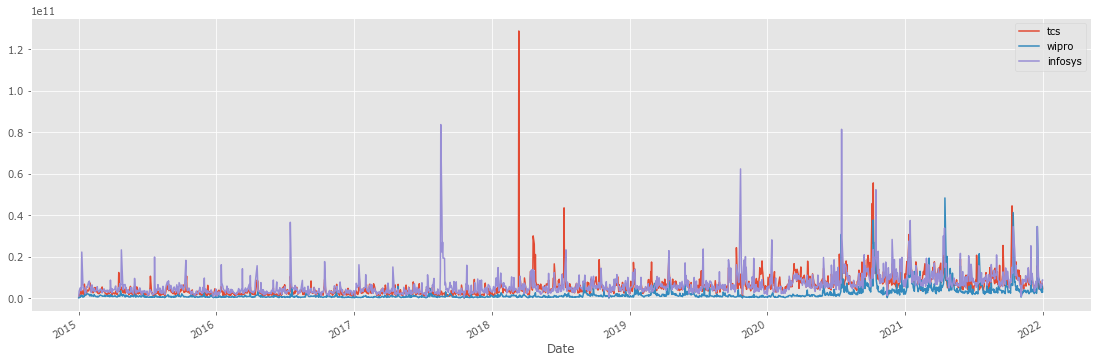

In [15]:
tcs['Total_traded'].plot(label='tcs', figsize=(19,6))
wipro['Total_traded'].plot(label='wipro')
infosys['Total_traded'].plot(label='infosys')
plt.legend()

In [16]:
tcs['Total_traded'].argmax()

788

In [17]:
tcs.iloc[[tcs['Total_traded'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close,Total_traded
Date,,,,,,,
2018-03-13,1469.849976,1436.0,1462.449951,1443.400024,88067154.0,1339.729248,1.287938e+11


<AxesSubplot:xlabel='Date'>

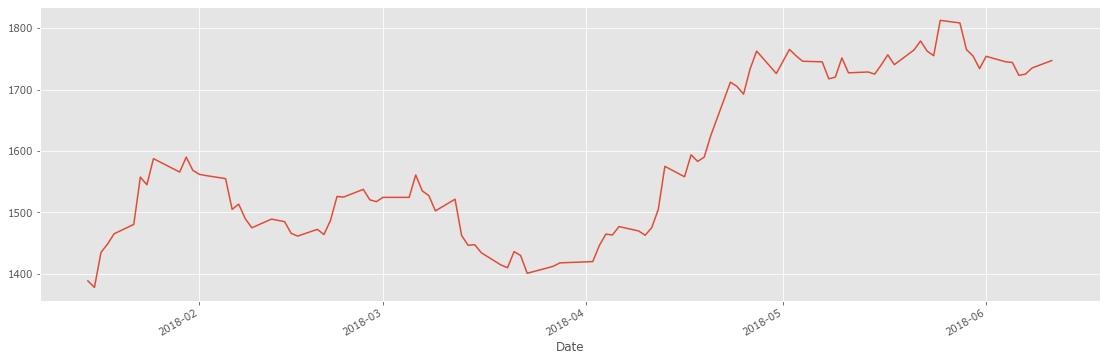

In [18]:
tcs.iloc[750:850]['Open'].plot(figsize=(19,6))

## <u><center>Let's calculate moving average for smoothing the graph</center>

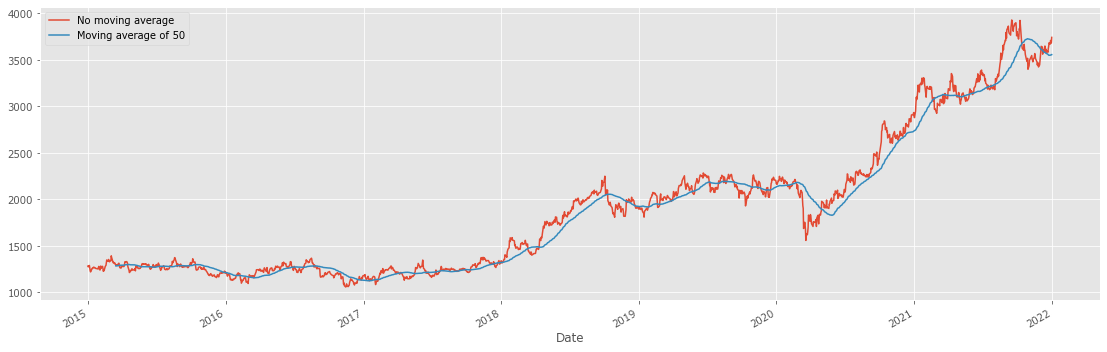

In [19]:
tcs['Open'].plot(label = 'No moving average', figsize=(19,6))
tcs['MA50'] = tcs['Open'].rolling(50).mean()
tcs['MA50'].plot(label = "Moving average of 50")
plt.legend()

In [20]:
from pandas.plotting import scatter_matrix
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [21]:
it_comp = pd.concat([tcs['Open'],wipro['Open'],infosys['Open']], axis=1)

In [22]:
it_comp.columns = ['tcs_open','wipro_open','infosys_open']

array([[<AxesSubplot:xlabel='tcs_open', ylabel='tcs_open'>,
        <AxesSubplot:xlabel='wipro_open', ylabel='tcs_open'>,
        <AxesSubplot:xlabel='infosys_open', ylabel='tcs_open'>],
       [<AxesSubplot:xlabel='tcs_open', ylabel='wipro_open'>,
        <AxesSubplot:xlabel='wipro_open', ylabel='wipro_open'>,
        <AxesSubplot:xlabel='infosys_open', ylabel='wipro_open'>],
       [<AxesSubplot:xlabel='tcs_open', ylabel='infosys_open'>,
        <AxesSubplot:xlabel='wipro_open', ylabel='infosys_open'>,
        <AxesSubplot:xlabel='infosys_open', ylabel='infosys_open'>]],
      dtype=object)

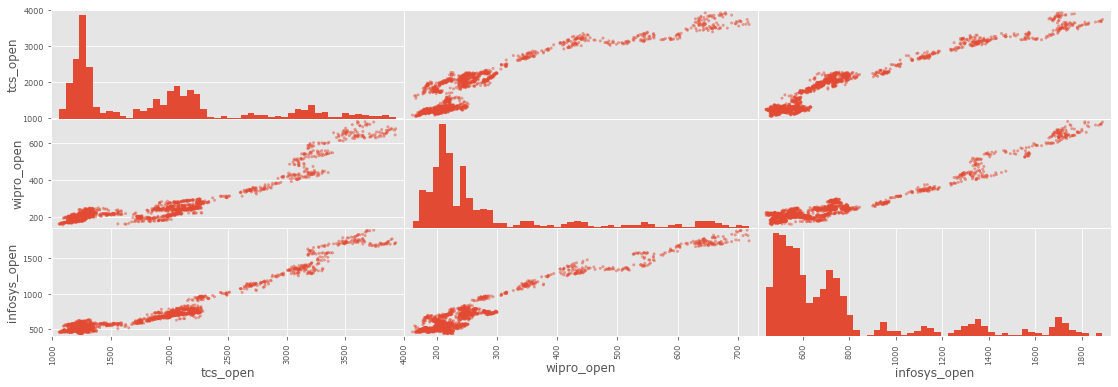

In [23]:
scatter_matrix(it_comp, figsize=(19,6), hist_kwds={'bins':50})

In [24]:
from mplfinance.original_flavor import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

tcs_reset = tcs.loc['2021-01':'2021-02'].reset_index()

tcs_reset['date_ex'] = tcs_reset['Date'].apply(lambda date: date2num(date))
tcs_values = [tuple(vals) for vals in tcs_reset[['date_ex','Open','High','Low','Close']].values]

mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

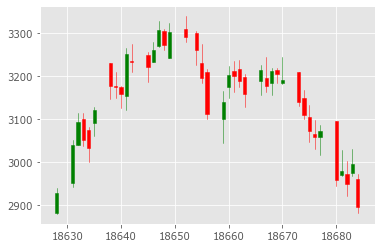

In [25]:
fig, ax = plt.subplots()
candlestick_ohlc(ax, tcs_values, width=0.6,colorup='g',colordown='r')
fig.patch.set_visible(False)

## <u><center>Daily Percentage Change(how volatile/steady stock is)</center></u>

In [26]:
tcs['return'] = (tcs['Close']/tcs['Close'].shift(1)) - 1
wipro['return'] = (wipro['Close']/wipro['Close'].shift(1))-1
infosys['return'] = (infosys['Close']/infosys['Close'].shift(1))-1

<AxesSubplot:>

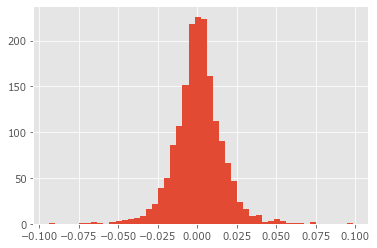

In [27]:
tcs['return'].hist(bins=50)

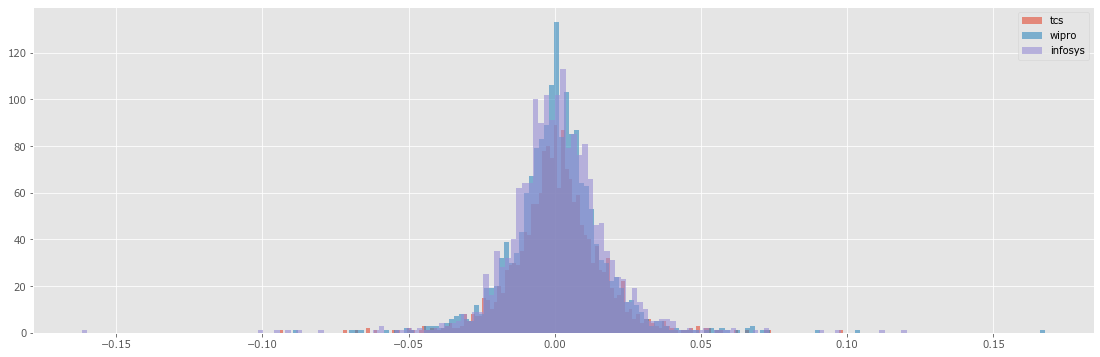

In [28]:
tcs['return'].hist(bins=150, label='tcs', alpha=0.6, figsize=(19,6))
wipro['return'].hist(bins=150,label='wipro', alpha=0.6)
infosys['return'].hist(bins=150, label='infosys', alpha=0.6)
plt.legend()

### using kde to normalize and visualize it properly

<AxesSubplot:ylabel='Density'>

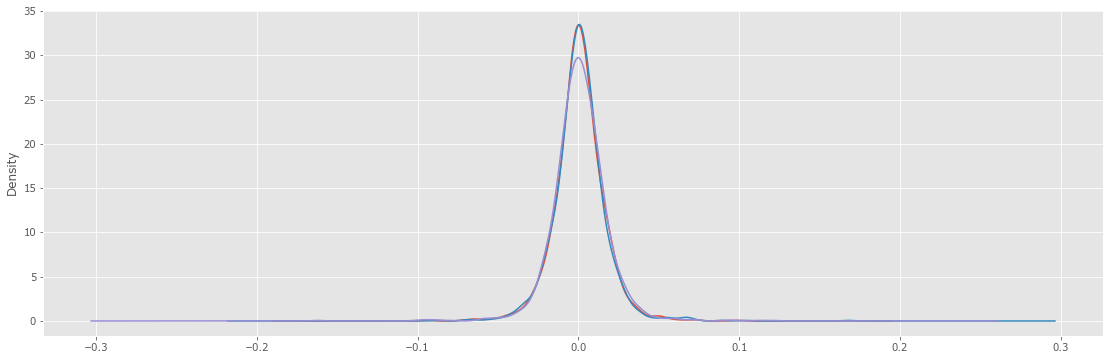

In [29]:
tcs['return'].plot(kind='kde', label='tcs', figsize=(19,6))
wipro['return'].plot(kind='kde', label='wipro')
infosys['return'].plot(kind='kde', label='infosys')

 ## <u><center>visulizing Boxplot</center> 

<AxesSubplot:>

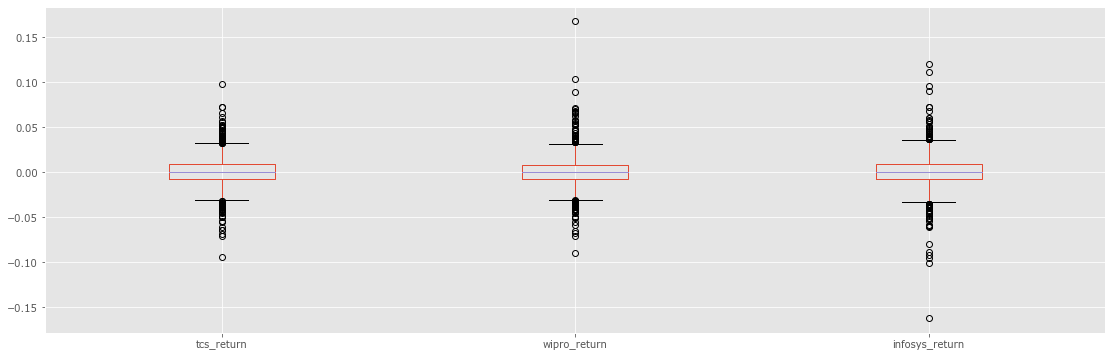

In [30]:
box_df = pd.concat([tcs['return'], wipro['return'], infosys['return']], axis=1)
box_df.columns = ['tcs_return','wipro_return','infosys_return']
box_df.plot(kind='box', figsize=(19,6))

array([[<AxesSubplot:xlabel='tcs_return', ylabel='tcs_return'>,
        <AxesSubplot:xlabel='wipro_return', ylabel='tcs_return'>,
        <AxesSubplot:xlabel='infosys_return', ylabel='tcs_return'>],
       [<AxesSubplot:xlabel='tcs_return', ylabel='wipro_return'>,
        <AxesSubplot:xlabel='wipro_return', ylabel='wipro_return'>,
        <AxesSubplot:xlabel='infosys_return', ylabel='wipro_return'>],
       [<AxesSubplot:xlabel='tcs_return', ylabel='infosys_return'>,
        <AxesSubplot:xlabel='wipro_return', ylabel='infosys_return'>,
        <AxesSubplot:xlabel='infosys_return', ylabel='infosys_return'>]],
      dtype=object)

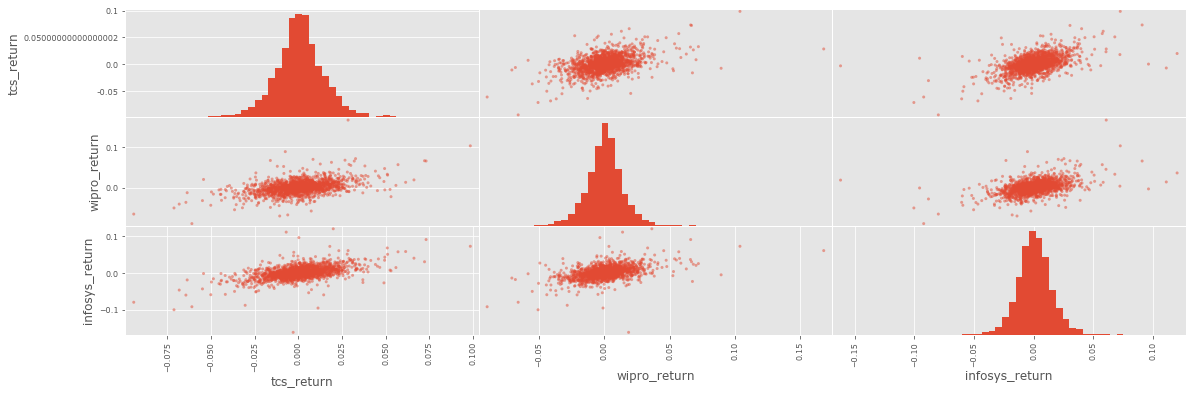

In [31]:
scatter_matrix(box_df,figsize=(19,6), hist_kwds={'bins':50})

## <u><center>Cumulative Return</center>

### if you invest 1 rs to in this 3 company at 1st jan 2015 now your return is

In [32]:
tcs['Cumulative_return'] = (1+tcs['return']).cumprod()
wipro['Cumulative_return'] = (1+wipro['return']).cumprod()
infosys['Cumulative_return'] = (1+infosys['return']).cumprod()

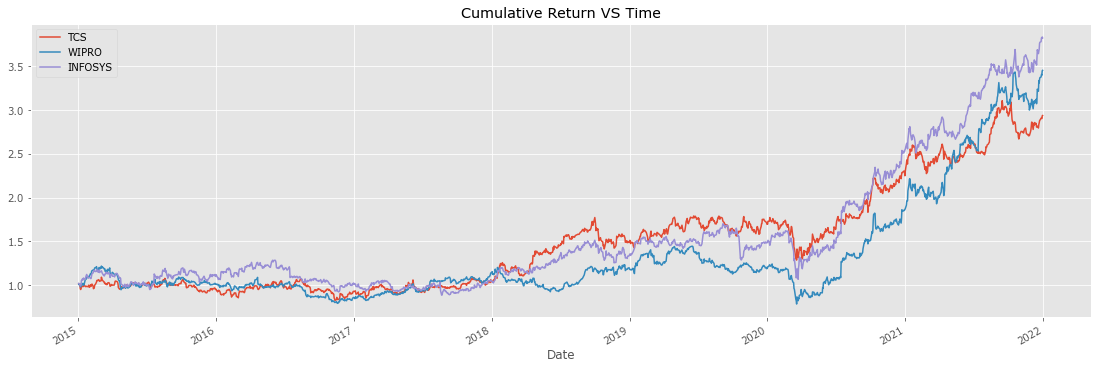

In [33]:
tcs['Cumulative_return'].plot(label='TCS', figsize=(19,6))
wipro['Cumulative_return'].plot(label='WIPRO')
infosys['Cumulative_return'].plot(label='INFOSYS')
plt.title('Cumulative Return VS Time')
plt.legend()

In [ ]:
print("hello")